In [208]:
import cv2
import numpy
import imutils
import skimage

In [209]:
imageA = cv2.imread("11.JPG")
imageB = cv2.imread("/content/11_spur_01.jpg")
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)

In [193]:
imageA = cv2.resize(imageA,(1000,500),interpolation=cv2.INTER_LINEAR)
imageB = cv2.resize(imageB,(1000,500),interpolation=cv2.INTER_LINEAR)

In [194]:
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
#cv2_imshow(grayA)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  90680      0 --:--:-- --:--:-- --:--:-- 90680


In [210]:
from skimage.measure import compare_ssim

In [196]:
# Structural Similarity Index (SSIM)
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff*255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.99170210265174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


In [197]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [198]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [199]:
#loop over the contours after threshold process
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    #cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 1)
    cv2.rectangle(imageB, (x, y), (x+w, y+h), (0, 0, 255), 1)

In [200]:
kernel = numpy.ones((5, 5), numpy.uint8)

In [201]:
#Dilation Morphology --> used to expand the original image
dilation = cv2.dilate(thresh,kernel,iterations = 1)

In [202]:
#Erosion Morphology --> used to shrink down the original image
erosion = cv2.erode(thresh,kernel,iterations = 1)

In [204]:
#Gradient is used to get the difference between Erosion and Dilation
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

In [205]:
#Opening --> Erosion followed by Dilation
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [206]:
#Closing --> Dilation followed by Erosion
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  75566      0 --:--:-- --:--:-- --:--:-- 75566


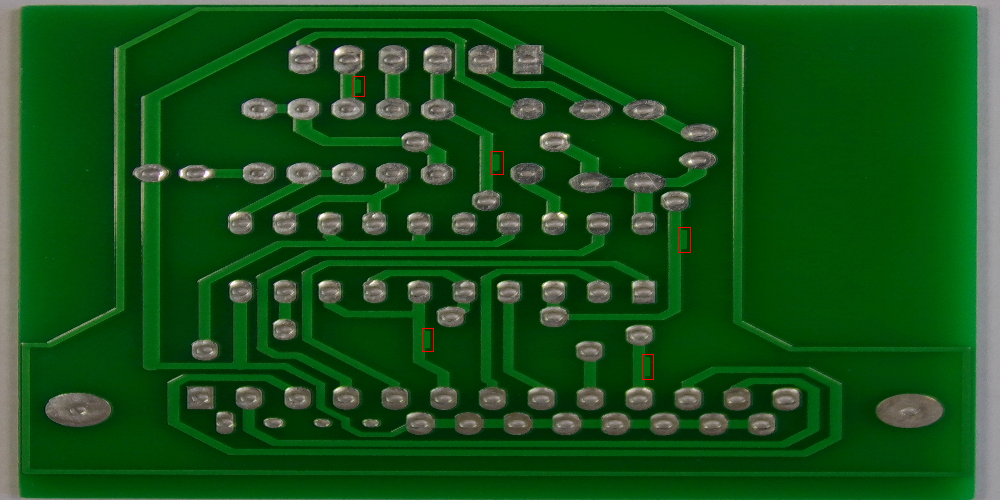

True

In [207]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
#imageB = cv2.rotate(imageB, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2_imshow(imageB)
cv2.imwrite('Defect_Detected_5.png', imageB)
